# This notebook contains methods to generate sets of graphs given a chromatic number

In [15]:
import networkx as nx
import numpy as np
import random
import matplotlib.pyplot as plt
import pickle

In [16]:
## YOu need all these methods to create a graph
def split(lst, n):
    """Split a list into exactly n sub-lists, as evenly as possible."""
    random.shuffle(lst)
    ix = np.linspace(0, len(lst), n + 1, dtype=int)
    return [lst[i:j] for i, j in zip(ix[:-1], ix[1:])]

def get_random_subset(LIST):
    k = random.randint(1, len(LIST))
    sample = random.sample(set(LIST), k)
    return sample

def is_vertex_connected_to_set(v, SET, N):
    for vertex in SET:
        if vertex in N[str(v)]:
            return True
    return False

def store_as_list_of_dicts(filename, graphs):
    list_of_dicts = [nx.to_dict_of_dicts(graph) for graph in graphs]
    with open(filename, 'wb') as f:
        pickle.dump(list_of_dicts, f)

def load_list_of_dicts(filename, create_using=nx.Graph):
    with open(filename, 'rb') as f:
        list_of_dicts = pickle.load(f)
    graphs = [create_using(graph) for graph in list_of_dicts]
    return graphs

def create_k_colorable_graph(n, k, print_sets=False):
    V = np.arange(n)
    E = []
    N = {}
    for v in V:
        N[str(v)] = []
    SETS = split(V, k) # Create k independent subsets
    if print_sets:
        print("Independent sets:")
        for SET in SETS:
            print(list(SET), end=" ")
    # Connect each set with every other set
    for i in range(len(SETS)):
        SET1 = SETS[i]
        for j in range(len(SETS)):
            if i!=j:
                SET2 = SETS[j]
                for v1 in SET1:
                    # Check that the vertex in SET1 is not already
                    # connected to SET2
                    if not is_vertex_connected_to_set(v1, SET2, N):
                        # If it's not, connect each vertex of SET1 to a
                        # random subset of SET2
                        SUBSET2 = get_random_subset(SET2)
                        for v2 in SUBSET2:
                            edge = (v1, v2)
                            E.append(edge)
                            N[str(v1)].append(v2)
                            N[str(v2)].append(v1)
    E = set(E)
    g = nx.Graph()
    g.add_nodes_from(V)
    g.add_edges_from(E)
    return g, V, E, N


def g_generator(Number_of_graphs, numb_vertices, chromatic_num):
    cnt = 0
    graphs = []
    all_sets = []
    n = numb_vertices
    print("Creating {} graphs with {} vertices and a chromatic number of {}.".format(N,n,chromatic_num))
    for cnt in range(Number_of_graphs):
        G, _, _, _ = create_k_colorable_graph(numb_vertices,
                                              chromatic_num)
        graphs.append(G)
        
    filename = "k-{}_{}-graphs_{}-vertices.pkl".format(chromatic_num, Number_of_graphs, numb_vertices)
    store_as_list_of_dicts(filename, graphs)
    print("{} graphs successfuly created!".format(Number_of_graphs))
    return graphs

## Generate and print a specific graph

Independent sets:
[1, 2, 4, 6, 3] [5, 7, 0, 9, 8] 

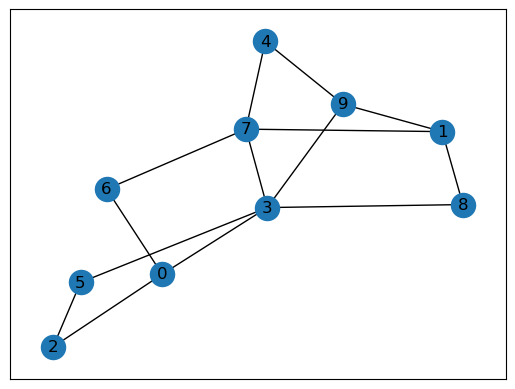

In [17]:
n = 10
k= 3
G, V, E, N = create_k_colorable_graph(10,2, print_sets=True)
pos = nx.spring_layout(G)
nx.draw_networkx(G,pos)
plt.show()

## Generate and save a list of graphs with the specified parameters
This is commented by default as the size of the files generated grow exponentially

In [18]:
N = 100
n = 20
k = 2
# graphs = g_generator(Number_of_graphs=N, numb_vertices=n, chromatic_num=k)

Creating 100 graphs with 20 vertices and a chromatic number of 2.
100 graphs successfuly created!
